# Board Game Review Prediction
## Training Linear Regression and Random Forest Regressor Model.

<img src='https://www.dailydot.com/wp-content/uploads/621/8b/adc6bb9f14e6941d.jpg' width="800">

Reviews can make or break a product; as a result, many companies take drastic measures to ensure that their product receives good reviews. When it comes to board games, reviews and word-of-mouth are everything. In this project, we will be using a linear regression model to predict the average review a board game will receive based on characteristics such as minimum and maximum number of players, playing time, complexity, etc. 

we will deploy a simple linear regression model to predict the average review of each board game. We will use the mean squared error as a performance metric. Furthermore, we will compare and contrast these results with the performance of an ensemble method. 

In [86]:
# importing required libraries
import sys
import numpy
import matplotlib
import seaborn
import pandas
import sklearn

print("Python {}".format(sys.version))
print("Numpy {}".format(numpy.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Pandas {}".format(pandas.__version__))
print("Sklearn {}".format(sklearn.__version__))
print("Seaborn {}".format(seaborn.__version__))

Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Numpy 1.16.2
Matplotlib 3.0.3
Pandas 0.24.1
Sklearn 0.20.3
Seaborn 0.9.0


In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [88]:
# Load dataset
df = pd.read_csv('games.csv')
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [89]:
# shape of dataset
print(df.columns)
df.shape

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


(81312, 20)

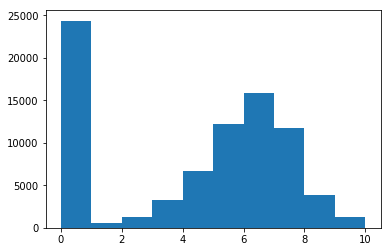

In [90]:
# Plot Histogram of all ratings in average_rating column
plt.hist(df['average_rating'])
plt.show()

Here we find that around 25,000 approx. games have zero rating, which isn't good.

In [91]:
# Print the first row of all the games with zero scores
print(df[df['average_rating']==0].iloc[0])

# Print the first row of all the games with scores greater than zero
print(df[df['average_rating']>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

For zero rated game above we see that it's yearpublished is 0 i.e. the game has never been published, hence we have 0 average_rating.

So we remove the rows from our dataset which have users_rated=0.

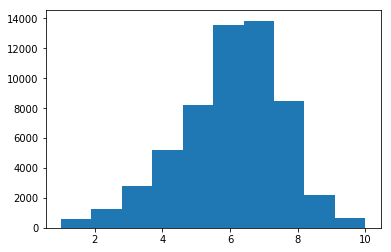

In [92]:
# Remove any rows without user reviews
df = df[df['users_rated'] > 0 ]

# Remove any rows with missing values
df = df.dropna(axis=0)

# Make histogram of all the average ratings
plt.hist(df['average_rating'])
plt.show()

In [93]:
print(df.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


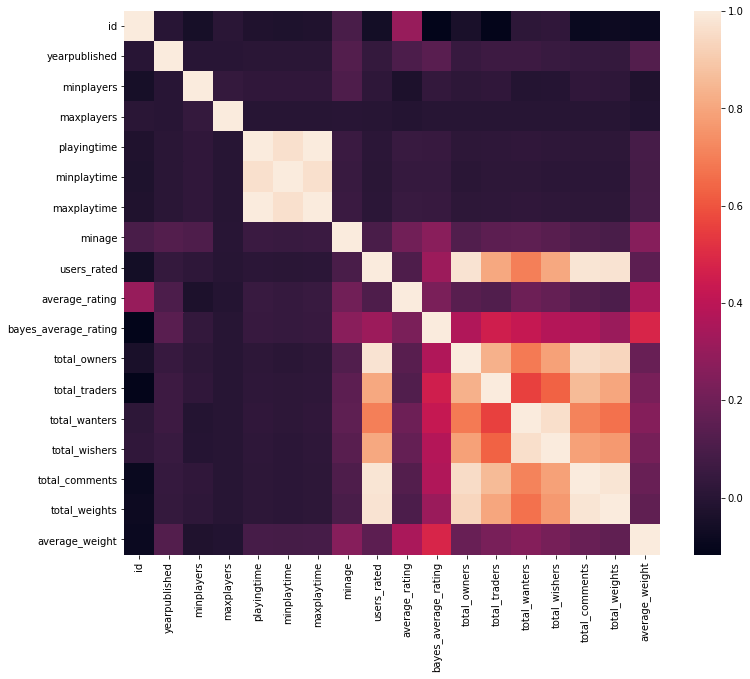

In [94]:
# Correlation matrix
fig = plt.figure(figsize = (12, 10))
sns.heatmap(df.corr())
plt.show()

Here we see the correlation among thee features.
Some of these features/characteristics of game which donot really tell us about rating, such has name of game, type, id etc.
so we need to remove such columns from our dataset.

In [95]:
# Get all the columns from the dataframe
columns = df.columns.tolist()

# filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['bayes_average_rating','average_rating', 'type', 'name', 'id']]

# Store the variable we'll be predicting on
target = 'average_rating'

In [103]:
# Generate training and test datasets
from sklearn.model_selection import train_test_split

# Generate training set
y = df['average_rating']
df.drop(['bayes_average_rating','average_rating', 'type', 'name', 'id'], axis=1, inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [104]:
print(X_train.shape)
print(X_test.shape)

(45515, 15)
(11379, 15)


In [105]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
lr = LinearRegression()

# fit the model the training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
# Genrate predictions for the test set
y_pred = lr.predict(X_test)

# Compute error between our test predictions and actual values
mean_squared_error(y_test, y_pred)

2.0847610712545173

Since from the correlation matrix we can see that average_rating doesn't have any strong linear relation with any of the features.
so the linear regression model would not be a perfect fit for our data. 

In [109]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialise the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)

# Fit to the data
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [110]:
# Predicting for test set
y_pred = RFR.predict(X_test)

# Compute the error 
mean_squared_error(y_test, y_pred)

1.4599222099037266

Here RandomForestRegressor model gives error as 1.45 which is less than error of Linear model i.e. 2.

In [122]:
# Predict for individual game
# Lets choose 1st game from test data
print(X_test.iloc[0])
y_test.iloc[0]

yearpublished     1992.0
minplayers           1.0
maxplayers           2.0
playingtime         60.0
minplaytime         60.0
maxplaytime         60.0
minage              12.0
users_rated          8.0
total_owners        38.0
total_traders        5.0
total_wanters        1.0
total_wishers        1.0
total_comments       8.0
total_weights        2.0
average_weight       3.0
Name: 32356, dtype: float64


5.5625

In [120]:
# Let's use both the models for predicting average_rating
pred_lr = lr.predict(X_test.iloc[0].values.reshape(1, -1))
pred_RFR = RFR.predict(X_test.iloc[0].values.reshape(1, -1))

# Print out the predictions
print(pred_lr)
print(pred_RFR)

[6.83440703]
[5.89491255]


### Conclusion: Linear Regression model predicts rate 6.83 and Random Forest Regressor model rated 5.89 which is very close to actual rating 5.56.